<a href="https://colab.research.google.com/github/codeboy47/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Akshit_Singh_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

## Libraries

In [238]:
# Import package
import pandas as pd
import numpy as np
import ast
from datetime import datetime
from datetime import date
import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [239]:
# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [240]:
# Import Sklearn Libraries
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

In [241]:
## Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [242]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data

In [263]:
# loading csv File
file_path = '/content/drive/MyDrive/Coronavirus Tweet Sentiment Analysis/Coronavirus Tweets.csv'
tweet_df = pd.read_csv(file_path, index_col = False, encoding='latin1')

In [244]:
# printing shape of the dataset
print("Shape of the Dataset:", tweet_df.shape)

Shape of the Dataset: (41157, 6)


In [264]:
# Using head function to get first 5 rows
tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [246]:
# using tail with a transpose to get the view of columns
tweet_df.tail().T

,41152,41153,41154,41155,41156
UserName,44951,44952,44953,44954,44955
ScreenName,89903,89904,89905,89906,89907
Location,"Wellington City, New Zealand",NaN,NaN,NaN,i love you so much || he/him
TweetAt,14-04-2020,14-04-2020,14-04-2020,14-04-2020,14-04-2020
OriginalTweet,Airline pilots offering to stock supermarket s...,Response to complaint not provided citing COVI...,You know itÂs getting tough when @KameronWild...,Is it wrong that the smell of hand sanitizer i...,@TartiiCat Well new/used Rift S are going for ...
Sentiment,Neutral,Extremely Negative,Positive,Neutral,Negative


In [247]:
# get the info of datasets
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [248]:
# checking if any null values are present in our dataset
count_of_null_values = tweet_df.isnull().sum()
count_of_null_values

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

Here we see Location column has around eight thousand five hundred null values.
<br><br>
#### **We don't have to remove the null values from the dataset because we have to classify the tweet on the basis of the text present in OriginalTweet column, hence Location column will not hamper the performance of our model.**

In [249]:
# checking duplicates in our dataset
value = len(tweet_df[tweet_df.duplicated()])
print("Total no. of duplicates = ", value)

Total no. of duplicates =  0


As we can see there are no duplicates in our dataset

In [250]:
# Setting the size of the graphs and also style of seaborn
style.use('seaborn-poster')
style.use('ggplot')
sns.set(style = 'darkgrid')

# Performing exploratory data analysis

## Count of tweets for every sentiment

In [251]:
# Grouping sentiments according to user count
sentiment_frequency = tweet_df.groupby(['Sentiment'], as_index = False).agg({'UserName': 'count'}).rename(columns = {'UserName' : 'frequency'})
sentiment_frequency

,Sentiment,frequency
0,Extremely Negative,5481
1,Extremely Positive,6624
2,Negative,9917
3,Neutral,7713
4,Positive,11422


Text(0, 0.5, 'Count')

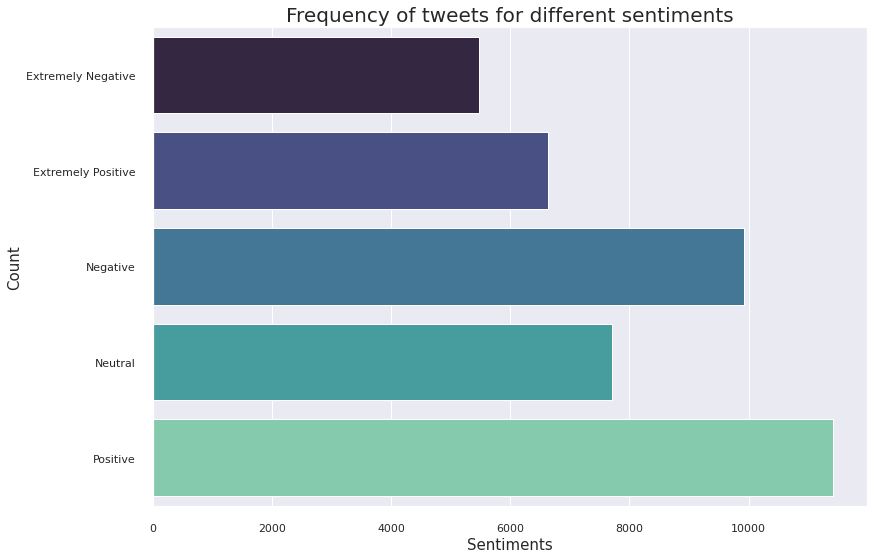

In [252]:
# setting seaborn plotting aesthetics for creating a bar chart
sns.barplot(
    x = 'frequency',
    y = 'Sentiment',
    data = sentiment_frequency,
    palette = ('mako'),
    orient = 'horizontal'
)
plt.title('Frequency of tweets for different sentiments', fontsize = 20)
plt.xlabel('Sentiments', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Inference: <br>
From the graph we can see most of the tweets are positive followed by negative tweets.

### Merging the classes Extremely Positive and Extremely Negative into Positive and Negative classes repectively.

In [253]:
# Creating three classes i.e Positive, Negative and Neutral
values = {
    'Sentiment': {'Extremely Negative': 'Negative', 'Extremely Positive': 'Positive'}
}
tweet_df.replace(values, inplace = True)

In [254]:
tweet_df['Sentiment'].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

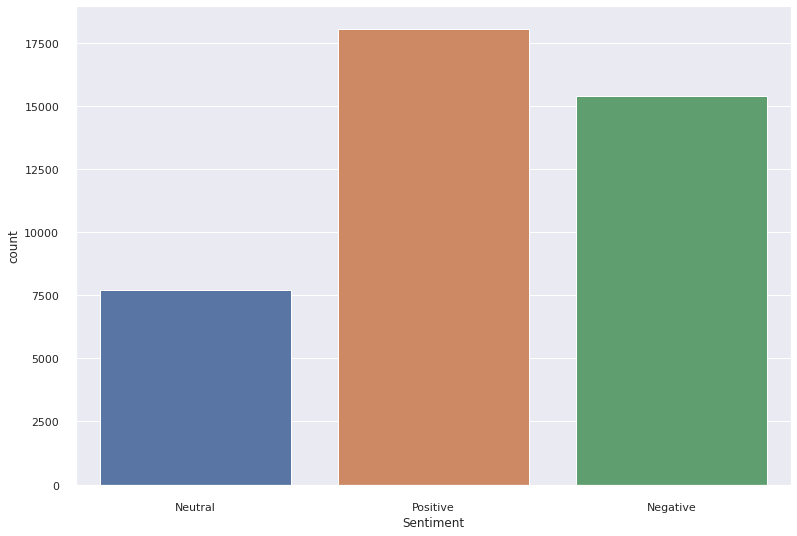

In [255]:
# count plot for Sentiments
sns.countplot(x = tweet_df['Sentiment'])

## Location-wise count of tweets

In [257]:
# Getting top 10 location-wise count of tweets
location_counts = tweet_df.groupby(['Location'], as_index = False).agg({'UserName': 'count'}).sort_values('UserName', ascending = False).rename(columns = {'UserName' : 'frequency'})[0:11]
location_counts

,Location,frequency
5690,London,540
10455,United States,528
5765,"London, England",520
7091,"New York, NY",395
10793,"Washington, DC",373
10433,United Kingdom,337
5872,"Los Angeles, CA",281
4729,India,268
10282,UK,232
1149,Australia,225


In [258]:
# Adding frequency of London and London, England
location_counts.loc[5765, ['frequency']] = location_counts.loc[5690, 'frequency'] + location_counts.loc[5765, 'frequency']
# Adding frequency of United Kingdom and UK
location_counts.loc[10433, ['frequency']] = location_counts.loc[10433, 'frequency'] + location_counts.loc[10282, 'frequency']
# Adding frequency of United States and USA
location_counts.loc[10455, ['frequency']] = location_counts.loc[10455, 'frequency'] + location_counts.loc[10342, 'frequency']
# Dropping these duplicate rows
location_counts.drop(index = [5690, 10282, 10342], inplace = True)

Text(0, 0.5, 'Count of tweets')

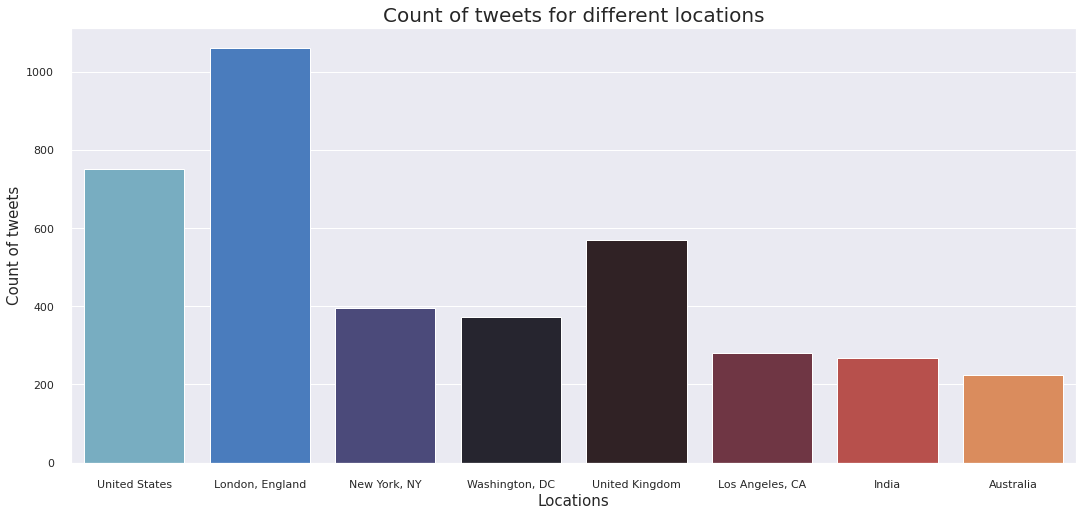

In [259]:
# plotting number of tweets location-wise
fig, ax = plt.subplots(figsize = (18, 8))
sns.barplot(
    x = 'Location',
    y = 'frequency',
    data = location_counts,
    palette = ('icefire')
)
plt.title('Count of tweets for different locations', fontsize = 20)
plt.xlabel('Locations', fontsize = 15)
plt.ylabel('Count of tweets', fontsize = 15)

Inference: <br>
We can see from the graph that maximum number of tweets are from London (England) and United States

## Understanding the sentiment of the tweets for various locations

In [260]:
# Creating the dataframe that contains location wise count of tweets for every sentiment
def tweets_sentiment_wise_per_location(location_list):

  df_list = []
  
  for location in location_list:
    location_df = tweet_df[tweet_df['Location'] == location].groupby(['Location', 'Sentiment'], as_index = False).agg({'UserName': 'count'}).sort_values('UserName', ascending = False).rename(columns = {'UserName' : 'frequency'})
    df_list.append(location_df)

  return pd.concat(df_list, ignore_index = True)

In [261]:
tweets_count = tweets_sentiment_wise_per_location(['London, England', 'United States', 'Australia', 'India', 'Canada'])
tweets_count

,Location,Sentiment,frequency
0,"London, England",Positive,218
1,"London, England",Negative,195
2,"London, England",Neutral,107
3,United States,Positive,245
4,United States,Negative,171
5,United States,Neutral,112
6,Australia,Negative,88
7,Australia,Positive,87
8,Australia,Neutral,50
9,India,Positive,116


Text(0, 0.5, 'Count of tweets')

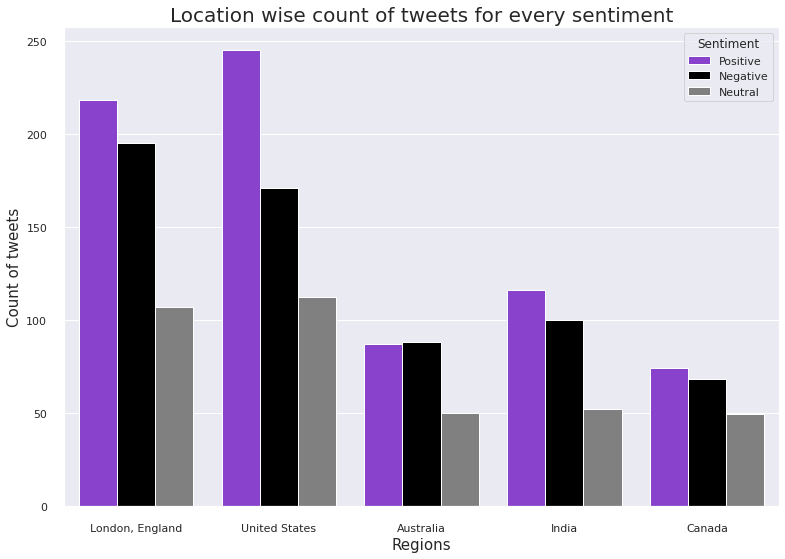

In [262]:
# setting seaborn plotting aesthetics for creating a grouped bar chart
sns.barplot(
    x = 'Location',
    y = 'frequency',
    hue = 'Sentiment',
    data = tweets_count,
    palette = ['blueviolet', 'black', 'grey']
)
plt.title('Location wise count of tweets for every sentiment', fontsize = 20)
plt.xlabel('Regions', fontsize = 15)
plt.ylabel('Count of tweets', fontsize = 15)

Inference: <br>


*   For all the countries except Australia, positive tweets are more in comparison to negative tweets.
*   For Australia, negative and positive tweets are almost the same.
*   Neutral tweets are the lowest for all the countries.

